## Código

# Implementar el GD  en una función y aplicar a los datos de publicidad de Tv y ventas

Los valores para $\theta_0$ y $theta_1$ que obtuve son 9.063458752642356 y 0.037223395607836614, respectivamente

In [ ]:
def MSE(h, Y):
  return np.sum((h - Y) ** 2) / (2 * len(Y))

def aplica_hipotesis(X, teta):
  return teta[1] * X + teta[0]

def cal_costo(X, Y, teta):
  h = aplica_hipotesis(X, teta)
  cost = MSE(h, Y)
  return cost

In [ ]:
from tqdm import tqdm
     
def entrena_gd(X, Y, teta, alfa = 0.01, epocas = 100):
  m = len(X)
  historia_teta = []
  for epoca in tqdm(range(epocas)):
    d_teta0, d_teta1 = 0, 0
    for i in range(m):
      hipotesis = teta[0] + (teta[1] * X[i])
      d_teta0 += hipotesis - Y[i]
      d_teta1 += (hipotesis - Y[i]) * X[i]
    teta[0] -= (alfa / m) * d_teta0
    teta[1] -= (alfa / m) * d_teta1
    historia_teta.append(teta)
    print(epoca, teta, cal_costo(X, Y, teta))
  return historia_teta

## Load data

In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/DL_course/Clase_2')

Mounted at /content/drive


In [ ]:
import pandas as pd, numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/DL_course/Clase_2/Advertising.csv')

In [ ]:
print(data.head())
print(data['TV'].shape)

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
(200,)


## Entrenamiento

In [ ]:
X, Y = data['TV'].to_numpy(),data["Sales"].to_numpy()
teta = [15, 15]
alfa = 5e-5
epocas = 200000


In [ ]:
from tqdm import tqdm
     
def entrena_gd(X, Y, teta, alfa = 0.01, epocas = 100):
  m = len(X)
  historia_teta = []
  for epoca in tqdm(range(epocas)):
    d_teta0, d_teta1 = 0, 0
    for i in range(m):
      hipotesis = teta[0] + (teta[1] * X[i])
      d_teta0 += hipotesis - Y[i]
      d_teta1 += (hipotesis - Y[i]) * X[i]
    teta[0] -= (alfa / m) * d_teta0
    teta[1] -= (alfa / m) * d_teta1
    historia_teta.append(teta.copy())
    # print(epoca, teta, cal_costo(X, Y, teta))
  return historia_teta

In [ ]:
historial_teta = entrena_gd(X, Y, teta, alfa = alfa, epocas = epocas)

# for idx, theta in enumerate(historial_teta):
#   print('\n', theta, cal_costo(X, Y, theta))

100%|██████████| 200000/200000 [00:47<00:00, 4216.98it/s]


In [ ]:
historial_teta

[[14.88966925, -6.706448752500005],
 [14.938932541071974, 3.0140672985141777],
 [14.916726919907832, -1.3389436561751182],
 [14.926526289689994, 0.6104090955312447],
 [14.921993284404026, -0.2625433412049065],
 [14.923878561202262, 0.12838027677493918],
 [14.922889624431818, -0.046681204328000075],
 [14.923187810999966, 0.03171502600478135],
 [14.922909603773851, -0.003391398764071185],
 [14.9228895172813, 0.01233058740289196],
 [14.922753841785527, 0.005290750443552689],
 [14.922669930834832, 0.008444043306875612],
 [14.922562840676393, 0.007032680021535629],
 [14.922466132391756, 0.007665447045602556],
 [14.922364776760276, 0.007382817893651782],
 [14.922265504121432, 0.007510118640826164],
 [14.922165300515214, 0.007453845828344829],
 [14.922065515643927, 0.0074797803551062796],
 [14.921965545088002, 0.007468901033998493],
 [14.921865659516733, 0.0074745075680486975],
 [14.921765737719804, 0.007472731447693988],
 [14.921665833977222, 0.007474261395692779],
 [14.92156592398146, 0.007

## Visualizemos el entrenamiento

In [ ]:
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

x = np.arange(0, np.max(X), 10)
print(historial_teta)

# plt.figure(figsize=(10, 7))
plt.xlabel('TV')
plt.ylabel('Sales')

for idx, theta in enumerate(historial_teta):
  if idx % 1 == 0:
    print(idx, theta)
    display.clear_output(wait=True)
    plt.scatter(X, Y, color = 'orange')

    plt.plot(x, aplica_hipotesis(x, theta), label = 'Época: ' + str(idx) + ', valor teta: ' + str(np.round(theta, 2)))
    plt.legend(loc="upper left")
    plt.show()
  

KeyboardInterrupt: ignored

## Podemos usar la libreria scikit-learn

https://scikit-learn.org/stable/


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x, y = data['TV'].to_numpy(),data["Sales"].to_numpy()

# print(X.shape)
x = x.reshape((len(x), 1))
# print(X.shape)

reg = LinearRegression()
reg = reg.fit(x, y)

print(reg.intercept_, reg.coef_[0])

print(mean_squared_error(y, aplica_hipotesis(x, [reg.intercept_, reg.coef_[0]])))
print(cal_costo(X, Y, [reg.intercept_, reg.coef_[0]]))


## Vectoricemos las operaciones

## Ante repasemos:

$h_\theta(x)$ es la hipótesis

En regresión lineal nuestra hipótesis tiene la forma:

$$h_\theta(x) = \theta_0 + \theta_1 x $$

$\theta = \{{\theta_0, \theta_1}\}$ son nuestros parámetros

$x$ es una característica o "feature" 

$n$ es el número de características y parámetros


$y$ es la salida esperada u objetivo 


$m$ es el número de muestras (número de ejemplos para realizar el entrenamiento)

$J(\theta)$ es la función de costo

$\min_{\theta} J(\theta)$ es mejorar nuestra $h_\theta$, es decir aprender

## Ahora sí vectorizemos

Empecemos con la hipótesis:
$$h_\theta(x) =  \theta_0 + \theta_1x$$

Primero recordemos el producto punto:





$$ 
 \mathbf{A} \cdot \mathbf{B}= 
 \begin{bmatrix} A_x & A_y & A_z\\\end{bmatrix}
 \begin{bmatrix} B_x\\ B_y\\ B_z\\\end{bmatrix}
 = A_xB_x+A_yB_y+A_zB_z\ $$

$1 \times 3$ . $3 \times 1$

Entonces la hipótesis $h_{\theta}$ la podemos expresar como:




Los parámetros:

$$\theta = 
\begin{bmatrix}
{\theta_0} \\
{\theta_1} \\
\end{bmatrix}
$$

Y nuestras características $X$:

$${X} = 
\begin{bmatrix}
1 & {x_1} \\
1 & {x_2} \\
.\\
.\\
.\\
1 & {x_m}\\
\end{bmatrix}
$$

*$x^0_{\{1,...,m\}} = 1$

*$x^1_{\{1,...,m\}} = x_{\{1,...,m\}}$



$m \times 2$ . $2 \times 1 $ = $m \times 1$

Con lo cuál:

$$h_\theta = X.\theta$$

### ¿Que pasa si pasamos de 1 a $n$ características?





Los parámetros:

$$\theta = 
\begin{bmatrix}
{\theta_0} \\
{\theta_1} \\
. \\
. \\
. \\
{\theta_{n}} 
\end{bmatrix}
$$

Las características:

$${X} = 
\begin{bmatrix}
{x^0_1} & {x^1_1} & . & . & {x^{n}_1}\\
{x^0_2} & {x^1_2} & . & . & {x^{n}_2} \\
.\\
.\\
.\\
{x^0_m} & {x^1_m} & . & . & {x^{n}_m}\\
\end{bmatrix}
$$

*$x^0_{\{1,...,m\}} = 1$



La hipótesis ${h_\theta} = X.\theta$:

$${h_\theta}= \begin{bmatrix}
{x^0_1} & {x^1_1} & . & . & {x^n_1}\\
{x^0_2} & {x^1_2} & . & . & {x^n_2} \\
.\\
.\\
.\\
{x^0_m} & {x^1_m} & . & . & {x^n_m}\\
\end{bmatrix}
\begin{bmatrix}
{\theta_0} \\
{\theta_1} \\
. \\
. \\
. \\
{\theta_{n}} 
\end{bmatrix}=\begin{bmatrix}
{h_0}\\
{h_1} \\
.\\
.\\
.\\
{h_m}\\
\end{bmatrix}
$$

*$x^0_{\{1,...,m\}} = 1$

## ¿Y la función de costo?


Recordemos que MSE está definida como:
$$J(\theta)  = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$

Puede expresarse como:

$$J(\theta)  = \frac{1}{2m}(X.\theta - Y)^T . (X.\theta - Y)$$


donde

$$Y = 
\begin{bmatrix}
{y_0} \\
{y_1} \\
. \\
. \\
. \\
{y_{m}} 
\end{bmatrix}
$$

## ¿Cuál es la generalización del Gradiente Descendente?



### El algoritmo de gradiente descendente

repetir hasta convergencia o se es alcanzado un número de épocas determinado {

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$ (para todos los $j$)

}

Donde $\alpha$ es la tasa de aprendizaje



Cuál es el patrón para calcular $$\frac{\partial J(\theta)}{\partial \theta_j}$$ donde $j = {1, ..., n}$ es el número de características

$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^0_i, x^1_i)- y_i)x^0_i$$

$$\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^0_i, x^1_i)- y_i)x^1_i$$

Viendo el patrón presente en las dos primeras derivadas parciales:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^1_i, ...,  x^n)- y_i)x^j_i$$

donde $j = \{0,...,n-1\}$

$$
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
.\\
.\\
.\\
\frac{\partial J(\theta)}{\partial \theta_{n}}\\
\end{bmatrix}
=\frac{1}{m}(h_\theta - Y)X^T = \frac{1}{m}(X.\theta - Y)X^T
$$


donde:


$${Y} = 
\begin{bmatrix}
{y_1} \\
{y_2}\\
.\\
.\\
.\\
{y_m}\\
\end{bmatrix}
$$

${x^1_{\{1, ..., m\}}} = 1$


Finalmente:

$$\begin{bmatrix}
{\theta_0} \\
{\theta_1} \\
.\\
.\\
.\\
{\theta_n}\\
\end{bmatrix}=
\begin{bmatrix}
{\theta_0} \\
{\theta_1} \\
.\\
.\\
.\\
{\theta_n}\\
\end{bmatrix}
-\alpha
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
.\\
.\\
.\\
\frac{\partial J(\theta)}{\partial \theta_n}\\
\end{bmatrix}$$


##¿Que pasa con el entrenamiento si antes normalizamos los valores?

Fórmula de estandarización general:

$$X = \frac{X - \mu}{\sigma}$$

Lo anterior transforma el conjunto de datos para que los valores sigan la propiedad de una distribución normal, es decir, con media 0 ($\mu = 0$) y desviación típica 1 ($\sigma = 1$).

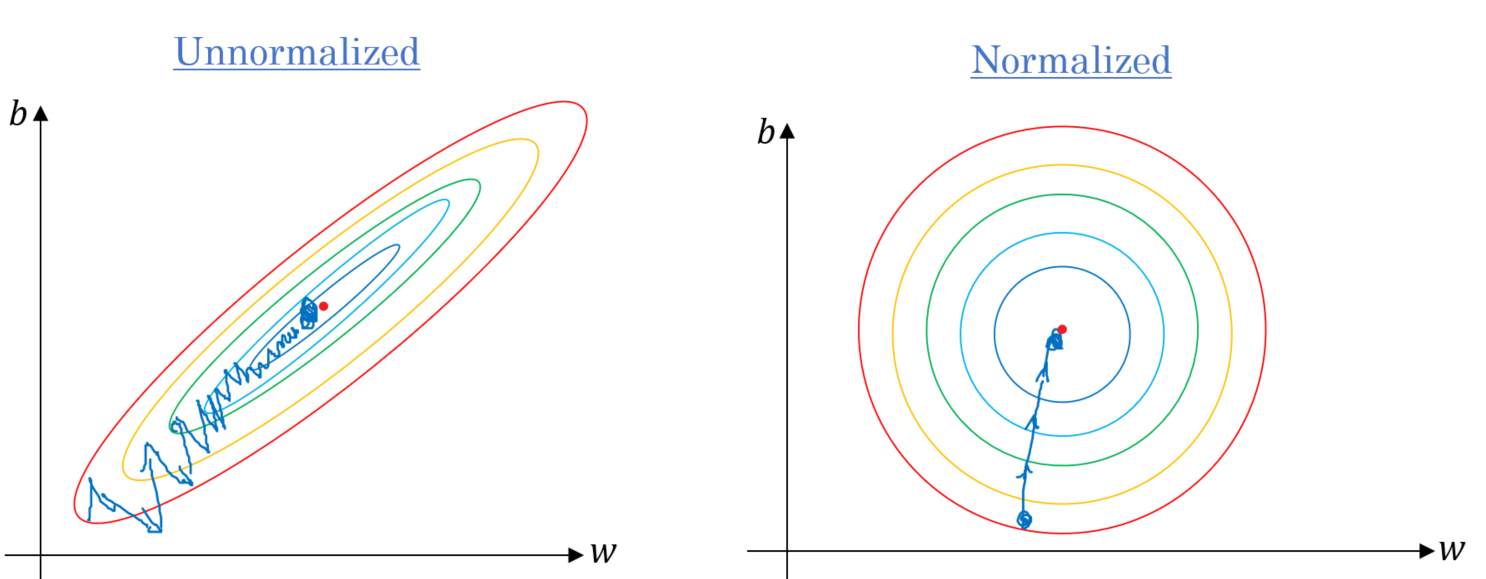

# Tarea: implementar la regresión multivariada para el dataset advertising o el de su examen.
